In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

# load data

In [2]:
df = pd.read_csv('all_items_no_duplicate.csv')
# view
from pprint import pprint

df.rename(columns={
    'Công ty phát hành': 'publisher',
    'Ngày xuất bản': 'publish_date',
    'Kích thước': 'size',
    'Loại bìa': 'cover_type',
    'Số trang': 'num_pages',
    'item': 'book_name'
}, inplace=True)
df.head(10)


,pid,rating_average,reviews_count,book_name,price,publisher,publish_date,size,cover_type,num_pages,category
0,304497.0,4.2,327,Hôm Nay Tôi Thất Tình,68700.0,Skybooks,2017-01-04 00:00:00,13 x 20.5 cm,Bìa mềm,200.0,sách tình cảm
1,339724.0,4.5,15,Người Đàn Bà Đang Yêu (Tiểu Thuyết),148000.0,Liên Việt,2011-06-03 00:00:00,16x24 cm,Bìa mềm,644.0,sách tiểu thuyết
2,341382.0,4.5,11,100 Ý Tưởng Viết Quảng Cáo Tuyệt Hay,89000.0,NXB Trẻ,2011-09-15 00:00:00,13 x 20.5 cm,Bìa mềm,318.0,sách viến tưởng
3,361889.0,0.0,0,60 Món Ăn Được Ưa Thích - Món Thịt Heo,24600.0,Công Ty TNHH Văn Hóa Việt Thư,2010-09-30 00:00:00,14.5 x 20.5 cm,Bìa mềm,64.0,sách nấu ăn
4,362055.0,4.7,14,"Nấu Ăn Ngon - Các Món Kho, Nướng",24600.0,Công Ty TNHH Văn Hóa Việt Thư,2011-12-30 00:00:00,14.5 x 20.5 cm,Bìa mềm,64.0,sách nấu ăn
5,362140.0,4.4,5,Món Ăn Hàng Ngày,24300.0,Công Ty TNHH Văn Hóa Việt Thư,2012-01-15 00:00:00,14.5 x 20.5 cm,Bìa mềm,64.0,sách nấu ăn
6,365991.0,4.8,19,Bộ Sách Phát Triển Trí Tuệ Trẻ Em (10 Cuốn) (T...,75500.0,Công Ty Cổ Phần Văn Hóa Đông A,2011-03-15 00:00:00,Đang cập nhật,Bìa mềm,160.0,sách trẻ em
7,366108.0,4.6,56,Tủ Sách Bách Khoa Tri Thức Trẻ Em - Bí Ẩn Của ...,63000.0,Huy Hoàng Bookstore,2012-10-15 00:00:00,20.5 x 27 cm,Bìa cứng,60.0,sách trẻ em
8,374106.0,4.7,59,Truyện Tranh Tuổi Thần Tiên (Bộ Túi 8 Cuốn),62000.0,Minh Long,2013-07-25 07:00:00,19 x 27 cm,NaN,NaN,truyện tranh
9,381234.0,4.7,1087,Cuốn Sách Hoàn Hảo Về Ngôn Ngữ Cơ Thể - Body L...,159000.0,Nhân Trí Việt,2014-08-03 00:00:00,14 x 21.5 cm,Bìa mềm,456.0,sách


# Split train val test

Trước khi tìm hiểu quá sâu về dữ liệu, chúng ta sẽ chia tập train val test trước, tránh tìm hiểu quá sâu và dữ liệu test

In [3]:
# save a original copy
df_original = df.copy()

In [4]:
# split data into train and test
train, test = train_test_split(df, test_size=0.2, random_state=42)

# Data Processing

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1611 entries, 261 to 1126
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pid             1611 non-null   float64
 1   rating_average  1611 non-null   float64
 2   reviews_count   1611 non-null   int64  
 3   book_name       1611 non-null   object 
 4   price           1611 non-null   float64
 5   publisher       1611 non-null   object 
 6   publish_date    708 non-null    object 
 7   size            545 non-null    object 
 8   cover_type      1169 non-null   object 
 9   num_pages       929 non-null    object 
 10  category        1611 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 151.0+ KB


Ta sẽ phải xử lý các đặc trưng dạng text để chuyển chúng về dạng số để có thể sử dụng làm input cho các mô hình

In [6]:
# create an empty array
Xtrain = np.empty((len(train), 0))
# concatenate rating_average to Xtrain
Xtrain = np.concatenate((Xtrain, train.rating_average.values.reshape(-1, 1)), axis=1)
# concatenate rating_count to Xtrain
Xtrain = np.concatenate((Xtrain, train.reviews_count.values.reshape(-1, 1)), axis=1)

Xtrain.shape

(1611, 2)

In [9]:
train['publish_year_gr'] = train.publish_date.apply(lambda x: x.split('-')[0] if type(x)==str else 'null')
train['publish_year_gr'] 

261     null
746     2020
1380    null
240     2019
1644    2022
        ... 
1130    null
1294    null
860     2021
1459    null
1126    2021
Name: publish_year_gr, Length: 1611, dtype: object

Do sử dụng các mô hình tree-based, việc feature extraction là vô cùng quan trọng

In [10]:
#Feature extraction

train['round_rating'] = train['rating_average'].apply(lambda x: int(x))
grs = ['publisher', 'category', 'cover_type', 'round_rating', 'publish_year_gr']
aggs = ['mean', 'max', 'min', 'std', 'median']
for gr in grs:
    for agg in aggs:
        train[gr + '_' + agg] = train.groupby(gr).price.transform(agg).fillna(0)
        
        Xtrain = np.concatenate((Xtrain, train[gr + '_' + agg].values.reshape(-1, 1)), axis=1)


## book_name

In [11]:
train.book_name.isnull().sum()

0

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=500)
vectorizer.fit(train['book_name'])
book_name_vectorized = vectorizer.transform(train['book_name'])


In [13]:
# see number of words in the dictionary
len(vectorizer.get_feature_names())

d:\miniconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


500

In [14]:
# concatenate book_name_vectorized to Xtrain
Xtrain = np.concatenate((Xtrain, book_name_vectorized.toarray()), axis=1)
Xtrain.shape

(1611, 527)

## publisher

In [15]:
# count null
train.publisher.isnull().sum()

0

In [16]:
# get all publisher that occurs more than 10 times
ls_publisher = list(train.publisher.value_counts()[train.publisher.value_counts() > 10].index)
ls_publisher

['Nhã Nam',
 'Alphabooks',
 'NXB Trẻ',
 'Nhiều công ty phát hành',
 'Đinh Tị',
 '1980 Books',
 'First News - Trí Việt',
 'Thái Hà',
 'Skybooks',
 'CÔNG TY CỔ PHẦN ĐẦU TƯ XUẤT BẢN - THIẾT BỊ GIÁO DỤC VIỆT NAM - CHI NHÁNH TẠI THÀNH PHỐ HỒ CHÍ MINH',
 'Minh Long',
 'MCBOOKS',
 'AZ Việt Nam',
 'Nhà sách Minh Thắng',
 'Công Ty Cổ Phần Văn Hóa Đông A',
 'NXB Chính Trị Quốc Gia Sự Thật',
 'NXB Kim Đồng',
 'Bách Việt',
 'Bloom Books',
 'Công Ty TNHH Văn Hóa Việt Thư',
 'NXB Phụ Nữ Việt Nam',
 'Nhà Xuất Bản Chính Trị Quốc Gia Sự Thật',
 'Huy Hoàng Bookstore',
 'Zenbooks',
 'Công Ty CP Văn Hóa Nhân Văn',
 'BIZBOOKS',
 'Nhà Xuất Bản Kim Đồng',
 'Phương Nam Book',
 ' Accord Publishing',
 'VIỆN GIÁO DỤC IRED']

In [17]:
def publisher2int(publisher):
    if publisher in ls_publisher:
        return ls_publisher.index(publisher)
    else:
        return len(ls_publisher)

temp = train.publisher.apply(publisher2int)
temp

261      0
746     30
1380    25
240     14
1644     2
        ..
1130     4
1294     1
860      0
1459    30
1126    30
Name: publisher, Length: 1611, dtype: int64

In [18]:
# one hot encoding for publisher
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(temp.values.reshape(-1, 1))
publisher_onehot = enc.transform(temp.values.reshape(-1, 1))
publisher_onehot.shape

(1611, 31)

In [19]:
# concatenate publisher_onehot to Xtrain
Xtrain = np.concatenate((Xtrain, publisher_onehot.toarray()), axis=1)
Xtrain.shape

(1611, 558)

## publish_date

In [20]:
train.columns

Index(['pid', 'rating_average', 'reviews_count', 'book_name', 'price',
       'publisher', 'publish_date', 'size', 'cover_type', 'num_pages',
       'category', 'publish_year_gr', 'round_rating', 'publisher_mean',
       'publisher_max', 'publisher_min', 'publisher_std', 'publisher_median',
       'category_mean', 'category_max', 'category_min', 'category_std',
       'category_median', 'cover_type_mean', 'cover_type_max',
       'cover_type_min', 'cover_type_std', 'cover_type_median',
       'round_rating_mean', 'round_rating_max', 'round_rating_min',
       'round_rating_std', 'round_rating_median', 'publish_year_gr_mean',
       'publish_year_gr_max', 'publish_year_gr_min', 'publish_year_gr_std',
       'publish_year_gr_median'],
      dtype='object')

Vì thời gian xuất bản chính xác không ảnh hưởng quá nhiều đến giá thành, ta sẽ chỉ lấy năm xuất bản làm đại diện

In [21]:
train.publish_date.isnull().sum()

903

Có tận gàn 1 nửa số sách không có thông tin ngày xuất bản, ta tạm cho trường này = 0 đối với những cuốn sách đó

In [22]:
# get only year from publish_date and set null value to 2022
temp = train.publish_date.apply(lambda x: int(x.split('-')[0]) if type(x)==str else 2022)
temp

261     2022
746     2020
1380    2022
240     2019
1644    2022
        ... 
1130    2022
1294    2022
860     2021
1459    2022
1126    2021
Name: publish_date, Length: 1611, dtype: int64

In [23]:
# concatenate temp to Xtrain
Xtrain = np.concatenate((Xtrain, temp.values.reshape(-1, 1)), axis=1)
Xtrain.shape

(1611, 559)

## size

In [24]:
train['size']

261              NaN
746              NaN
1380             NaN
240              NaN
1644       15.5 x 23
            ...     
1130             NaN
1294             NaN
860     14 x 20.5 cm
1459             NaN
1126    14 x 20.5 cm
Name: size, Length: 1611, dtype: object

In [25]:
# get values that does not contain 'x' and is not null
temp = train['size'].copy()
temp[temp.apply(lambda x: 'x' not in str(x) and type(x) == str)]

6                                 Đang cập nhật
290                             <p>19*27 Cm</p>
139                                  17 X 24 cm
362                                <p>15*22</p>
133                             13 cm × 20.5 cm
257                                <p>16*24</p>
304    <p>Khổ: 17.4*22.5 cm</p>\n<p>&nbsp;</p>
Name: size, dtype: object

Ta sẽ tách feature này thành 2 feature: chiều dài và chiều rộng để tiện tính toán. Trước đó, ta phải convert các giá trị trong trường này về cùng 1 dạng chuẩn mà ta có thể extract thông tin từ đó (w x h cm hoặc w x h)

In [26]:
# lower case all values
temp = train['size'].apply(lambda x: str(x).lower() if type(x) == str else x)
# replace '*' with ' x '
temp = temp.apply(lambda x: str(x).replace('*', ' x ') if type(x) == str else x)
# replace outlier
temp = temp.apply(lambda x: '13 x 20.5 cm' if x == '13 cm × 20.5 cm' else x)
temp = temp.apply(lambda x: np.nan if x == 'đang cập nhật' else x)

temp[temp.apply(lambda x: 'x' not in str(x) and type(x) == str)]

Series([], Name: size, dtype: object)

ok, now get width and height

In [27]:
# iterate over value in temp
ls_false_idx = []
for idx, size in enumerate(temp):
    if type(size) == str:
        try:
            # get width
            width = float(size.split()[0].strip())
            # get height
            height = float(size.split()[2].strip())
        except Exception as e:
            ls_false_idx.append(idx)
            continue

# see value at false indexes
temp.iloc[ls_false_idx]

365    <table id="chi-tiet" class="table table-border...
259    <p>&nbsp;</p>\n<table id="chi-tiet" class="tab...
572                                       <p>20x23cm</p>
192    <p><span style="color:#333333;font-family:aria...
141                                     <p>18 x 18cm</p>
                             ...                        
276    <p><span style="color:#242424;font-family:robo...
385                                              13x20,5
130                                   <p>13,5x20,5cm</p>
466    <table id="chi-tiet" class="table table-border...
121                                            14 x 20,5
Name: size, Length: 182, dtype: object

In [28]:
import re

# replace all charater that is not digit or '.' or 'x' with ''
temp = temp.apply(lambda x: re.sub(r'[^0-9x.]', '', str(x)) if type(x) == str else x)
temp

261         NaN
746         NaN
1380        NaN
240         NaN
1644    15.5x23
         ...   
1130        NaN
1294        NaN
860     14x20.5
1459        NaN
1126    14x20.5
Name: size, Length: 1611, dtype: object

In [29]:
# check again
ls_false_idx = []
for idx, size in enumerate(temp):
    if type(size) == str:
        try:
            # get width
            width = float(size.split('x')[0].strip())
            # get height
            height = float(size.split('x')[1].strip())
        except Exception as e:
            ls_false_idx.append(idx)
            continue

# see value at false indexes
temp.iloc[ls_false_idx]

259    xx0xx100880x20x1x3333330xxxxxx10x15x1.428571x0...
265    xx0xx100880x20x1x3333330xxxxxx10x15x1.428571x0...
272                                               x20x20
236    xx0xx100880x20x1x3333330xxxxxx10x15x1.428571x0...
228    0xx100880x20x1x333333010x15x1.428571x0x2424241...
191    xx0xx100880x20x1x3333330xxxxxx10x15x1.428571x0...
263    xx0xx100880x20x1x3333330xxxxxx10x15x1.428571x0...
252    xx0xx100880x20x1x3333330xxxx999xx10x15x1.42857...
Name: size, dtype: object

In [30]:
# correct value at false indexes
temp[272] = temp[272][1:]
temp[272]

'20x20'

ok now the data is in the same format, we can extract width and height from that

In [31]:
# get width
width = temp.apply(lambda x: (float(x.split('x')[0].strip()) if len(x.split('x')[0].strip()) else 14.5) if type(x) == str else 14.5)
# get height
height = temp.apply(lambda x: (float(x.split('x')[1].strip()) if len(x.split('x')[1].strip()) else 20.5) if type(x) == str else 20.5)

In [32]:
width

261     14.5
746     14.5
1380    14.5
240     14.5
1644    15.5
        ... 
1130    14.5
1294    14.5
860     14.0
1459    14.5
1126    14.0
Name: size, Length: 1611, dtype: float64

In [33]:
height

261     20.5
746     20.5
1380    20.5
240     20.5
1644    23.0
        ... 
1130    20.5
1294    20.5
860     20.5
1459    20.5
1126    20.5
Name: size, Length: 1611, dtype: float64

In [34]:
# concatenate width and height to Xtrain
Xtrain = np.concatenate((Xtrain, width.values.reshape(-1, 1)), axis=1)
Xtrain = np.concatenate((Xtrain, height.values.reshape(-1, 1)), axis=1)
Xtrain.shape

(1611, 561)

## cover_type

In [35]:
train.cover_type.value_counts(dropna=False)

Bìa mềm               1018
NaN                    442
Bìa cứng               125
Bìa gập                 15
Bìa rời                  3
Bìa Da                   2
B Format Paperback       2
Paperback                2
B-format Paperback       1
Hardback                 1
Name: cover_type, dtype: int64

In [36]:
# fill null value with 'Bìa mềm'
train.cover_type = train.cover_type.fillna('Bìa mềm')
train.cover_type.value_counts(dropna=False)

Bìa mềm               1460
Bìa cứng               125
Bìa gập                 15
Bìa rời                  3
Bìa Da                   2
B Format Paperback       2
Paperback                2
B-format Paperback       1
Hardback                 1
Name: cover_type, dtype: int64

In [37]:
# one hot encoding for cover_type
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train.cover_type.values.reshape(-1, 1))
cover_type_onehot = enc.transform(train.cover_type.values.reshape(-1, 1))
cover_type_onehot.shape

(1611, 9)

In [38]:
# concatenate cover_type_onehot to Xtrain
Xtrain = np.concatenate((Xtrain, cover_type_onehot.toarray()), axis=1)
Xtrain.shape

(1611, 570)

## num_pages

In [39]:
train.num_pages

261     457.0
746      24.0
1380    420.0
240     352.0
1644    336.0
        ...  
1130      NaN
1294      NaN
860     400.0
1459    400.0
1126    794.0
Name: num_pages, Length: 1611, dtype: object

In [40]:
# distribution of data type of num_pages
train.num_pages.apply(lambda x: type(x)).value_counts()

<class 'str'>      929
<class 'float'>    682
Name: num_pages, dtype: int64

In [41]:
# see value that has type str
train.num_pages[train.num_pages.apply(lambda x: type(x) == str)]

261     457.0
746      24.0
1380    420.0
240     352.0
1644    336.0
        ...  
1044     72.0
1095      466
860     400.0
1459    400.0
1126    794.0
Name: num_pages, Length: 929, dtype: object

In [42]:
train.num_pages

261     457.0
746      24.0
1380    420.0
240     352.0
1644    336.0
        ...  
1130      NaN
1294      NaN
860     400.0
1459    400.0
1126    794.0
Name: num_pages, Length: 1611, dtype: object

In [43]:
# convert all to float
def get_num_page(x):
    if type(x) == str:
        try:
            return float(x)
        except:
            return np.nan
    return x
    
train['num_pages'] = train.num_pages.apply(get_num_page)


ta thấy num_pages có mối liên hệ khá chặt chẽ với category, vì một số category có nhiều trang hơn những category còn lại. Do đó ta sẽ fill null bằng giá trị trung bình của category tương ứng của nó

In [44]:
# fill nan with the mean of same category
temp = train.groupby('category').num_pages.transform(lambda x: x.fillna(x.mean()))


In [45]:
temp

261      457.000000
746       24.000000
1380     420.000000
240      352.000000
1644     336.000000
           ...     
1130      56.727273
1294    1021.790698
860      400.000000
1459     400.000000
1126     794.000000
Name: num_pages, Length: 1611, dtype: float64

In [46]:
# concatenate temp to Xtrain
Xtrain = np.concatenate((Xtrain, temp.values.reshape(-1, 1)), axis=1)

In [47]:
Xtrain.shape

(1611, 571)

## category

In [48]:
train.category.value_counts(dropna=False)

sách tư duy          94
sách nhật bản        91
sách kĩ năng sống    89
sách tiếng việt      88
sách văn học         81
sách thiếu nhi       81
sách kinh tế         77
sách tiểu thuyết     74
sách giáo khoa       73
sách tiếng anh       73
sách                 72
sách nước ngoài      70
sách trẻ em          66
sách chính trị       64
sách bí ẩn           61
truyện tranh         60
sách lịch sử         60
tiểu sử              53
sách tình cảm        53
sách tôn giáo        52
tạp chí              45
sách viến tưởng      37
sách bán chạy        36
sách nấu ăn          33
truyện ngắn          28
Name: category, dtype: int64

In [49]:
# one hot encoding for category
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(train.category.values.reshape(-1, 1))
category_onehot = enc.transform(train.category.values.reshape(-1, 1))
category_onehot.shape

(1611, 25)

In [50]:
# concatenate category_onehot to Xtrain
Xtrain = np.concatenate((Xtrain, category_onehot.toarray()), axis=1)
Xtrain.shape

(1611, 596)

Vậy ta đã xây dựng được tập Xtrain từ tất cả các feature. ytrain chính là cột "price" trong dataframe

In [51]:
ytrain = train.price.values
ytrain

array([167860., 108000.,  97900., ..., 108000., 256750., 189000.])

In [52]:
ytrain.shape

(1611,)

# Modeling

In [53]:
from sklearn.metrics import mean_absolute_error

def plot_learning_curve(model, Xtrain, ytrain, Xval, yval):        
    N, d = Xtrain.shape
    train_loss, test_loss = [], []
    batches = range(100, N, 100)
    
    for m in batches:
        Xsub = Xtrain[:m, :]
        ysub = ytrain[:m].ravel()
        model.fit(Xsub,ysub)
        ysub_pred = model.predict(Xsub)
        train_loss.append(mean_absolute_error(ysub, ysub_pred))  # log_loss is the logistic loss function
        
        yval_pred = model.predict(Xval)
        test_loss.append(mean_absolute_error(yval, yval_pred))
    
    plt.figure(figsize=(15,10))
    plt.plot(batches, train_loss, ls='-', label = 'Train Loss', c='b', marker='o')
    plt.plot(batches, test_loss, ls='-', label='Test Loss', c='r', marker='x')
    plt.xlabel('Number of examples to train')
    plt.ylabel('Log Loss')
    plt.legend()
    plt.show()

    return model, train_loss, test_loss

In [54]:
# scale data
from sklearn.preprocessing import StandardScaler

Xtrain_original = Xtrain.copy()
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain = scaler.transform(Xtrain)

In [55]:
x_train, x_val, y_train, y_val = train_test_split(Xtrain, ytrain, test_size=0.2, random_state=42)

In [56]:
train[train.book_name.apply(lambda x: 'ấn ' in x or ' ấn' in x)]

,pid,rating_average,reviews_count,book_name,price,publisher,publish_date,size,cover_type,num_pages,...,round_rating_mean,round_rating_max,round_rating_min,round_rating_std,round_rating_median,publish_year_gr_mean,publish_year_gr_max,publish_year_gr_min,publish_year_gr_std,publish_year_gr_median
1433,170706985.0,4.9,7,Bản Đồ Tư Duy Trong Giải Quyết Vấn Đề (Tái Bản),75900.0,Alphabooks,2022-03-01 00:00:00,15x15cm,Bìa mềm,164.0,...,122017.058252,1456500.0,11400.0,117239.608212,89800.0,178973.952632,3500000.0,11100.0,315044.470548,106000.0
1608,186348395.0,0.0,0,Combo 2 cuốn Tiểu Thuyết: Trúc Thư Dao 1 - Nướ...,379500.0,Nhiều công ty phát hành,NaN,NaN,Bìa mềm,NaN,...,175041.722870,3500000.0,8600.0,200178.674222,135000.0,168941.178295,2500000.0,8600.0,156704.333296,139440.0
1509,179064444.0,0.0,0,THẾ GIỚI PHẬT GIÁO - ấn bản bìa da in 500c – T...,2500000.0,Thái Hà Book,NaN,NaN,Bìa mềm,NaN,...,175041.722870,3500000.0,8600.0,200178.674222,135000.0,168941.178295,2500000.0,8600.0,156704.333296,139440.0
1540,181673835.0,0.0,0,KIM – Rudyard Kipling – bìa cứng – Xuân Hồng d...,178000.0,NXB Kim Đồng,NaN,NaN,Bìa cứng,365.0,...,175041.722870,3500000.0,8600.0,200178.674222,135000.0,168941.178295,2500000.0,8600.0,156704.333296,139440.0
242,21180258.0,0.0,0,Combo 3 Cuốn Sách Tôn Giáo - Tâm Linh: Đạo - T...,335250.0,Thái Hà,NaN,NaN,Bìa mềm,NaN,...,175041.722870,3500000.0,8600.0,200178.674222,135000.0,168941.178295,2500000.0,8600.0,156704.333296,139440.0
667,56021249.0,4.9,259,Trấn Hồn - Tập 1 (Tặng Kèm 1 Bookmark 2 Mặt),122000.0,Cẩm Phong Books,NaN,14 x 20.5 cm,Bìa mềm,480.0,...,122017.058252,1456500.0,11400.0,117239.608212,89800.0,168941.178295,2500000.0,8600.0,156704.333296,139440.0
1536,181453319.0,0.0,0,MOBY DICK CÁ VOI TRẮNG – Herman Melville – bìa...,286000.0,NXB Kim Đồng,NaN,NaN,Bìa cứng,732.0,...,175041.722870,3500000.0,8600.0,200178.674222,135000.0,168941.178295,2500000.0,8600.0,156704.333296,139440.0
1585,185104325.0,0.0,0,[bìa cứng sách artbook] KÝ MỘNG – Nguyễn Du – ...,143000.0,Kim Đồng,NaN,NaN,Bìa cứng,70.0,...,175041.722870,3500000.0,8600.0,200178.674222,135000.0,168941.178295,2500000.0,8600.0,156704.333296,139440.0
562,50240864.0,4.8,104,Sách IRED Books - Tuổi Trẻ Tự Vấn - Vũ Đức Trí...,76000.0,VIỆN GIÁO DỤC IRED,2020-03-01 00:00:00,12 x 20 cm,Bìa mềm,248.0,...,122017.058252,1456500.0,11400.0,117239.608212,89800.0,124985.413793,844400.0,12200.0,111641.341237,89500.0
1705,193439349.0,0.0,0,Sách THE MOUNTAIN IS YOU - Nếu Không Giải Quyế...,106560.0,BIZBOOKS,NaN,NaN,Bìa mềm,303.0,...,175041.722870,3500000.0,8600.0,200178.674222,135000.0,168941.178295,2500000.0,8600.0,156704.333296,139440.0


## Linear Regression

In [57]:
# linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

liner_reg = LinearRegression()
liner_reg.fit(x_train, y_train)
y_pred = liner_reg.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  122642.12648130272 1.1076653301216837


## Elastic Net

In [58]:
# elastic net
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x_train, y_train)
y_pred = elastic_net.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  101921.93427396969 0.8632790921596637


## KNN Regression

In [59]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  90957.46873065016 0.7234099194975123


## Random Forest

In [60]:
# Random Forest Regessor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  67763.06651898769 0.4845640276109874


## Gradient Boosting

In [61]:
# gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=10, random_state=42)
gbr.fit(x_train, y_train)
y_pred = gbr.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  64684.40850939787 0.3848865526063879


## Support Vector Machine

In [62]:
# support vector machine
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(x_train, y_train)
y_pred = svr.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  97736.68619347623 0.8647469879543335


## LGBM Regressor

In [63]:
# lgbm regressor
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(n_estimators=100, max_depth=10, random_state=42)
lgbm.fit(x_train, y_train)
y_pred = lgbm.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  67786.6960330553 0.4554444464953307


## XG Boost

In [64]:
# xg boost
import xgboost

xgb = xgboost.XGBRegressor(n_estimators=100, max_depth=10, random_state=42)
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  64989.12284732972 0.3937020978910201


## MLP Regressor

In [65]:
# catboost regressor
import catboost

# neural network
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
mlp.fit(x_train, y_train)
y_pred = mlp.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  101156.93396468234 0.7914652559512048


d:\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


## CatBoost

In [66]:
# catboost regressor
import catboost

cat = catboost.CatBoostRegressor(n_estimators=100, max_depth=10, random_state=42)
cat.fit(x_train, y_train)
y_pred = cat.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

Learning rate set to 0.277042
0:	learn: 169715.0343625	total: 166ms	remaining: 16.4s
1:	learn: 165009.9376451	total: 191ms	remaining: 9.37s
2:	learn: 160047.5803362	total: 215ms	remaining: 6.94s
3:	learn: 155783.2036698	total: 238ms	remaining: 5.72s
4:	learn: 153132.2562247	total: 261ms	remaining: 4.95s
5:	learn: 146009.0007717	total: 263ms	remaining: 4.12s
6:	learn: 142781.0375282	total: 284ms	remaining: 3.78s
7:	learn: 141091.7799259	total: 306ms	remaining: 3.52s
8:	learn: 131197.8212551	total: 329ms	remaining: 3.33s
9:	learn: 122406.6944244	total: 352ms	remaining: 3.17s
10:	learn: 116045.3318022	total: 376ms	remaining: 3.04s
11:	learn: 114532.7787112	total: 398ms	remaining: 2.92s
12:	learn: 108691.7288324	total: 418ms	remaining: 2.8s
13:	learn: 107810.3599325	total: 422ms	remaining: 2.59s
14:	learn: 106259.0866155	total: 445ms	remaining: 2.52s
15:	learn: 102948.9810006	total: 467ms	remaining: 2.45s
16:	learn: 101487.7063482	total: 490ms	remaining: 2.39s
17:	learn: 96025.8947949	tota

## Finetune

Ta thấy các model dạng tree-based cho kết quả ban đầu có vẻ tốt hơn, nên ta sẽ thử finetune những mô hình này

In [67]:
def gen_col_names(prefix, n):
    return [prefix + str(i) for i in range(n)]

In [68]:
aggs_col = []
for gr in grs:
    for agg in aggs:
        aggs_col.append(gr + '_' + agg)

In [69]:
cols = ['rating', 'reviews_count'] + aggs_col + gen_col_names('name', 500) + gen_col_names('publisher', 31) + gen_col_names('publish_date', 1) + ['width', 'height'] + gen_col_names('cover_type', 9) + ['num_pages'] + gen_col_names('category', 25)
train_df = pd.DataFrame(x_train, columns=cols)
val_df = pd.DataFrame(x_val, columns=cols)

train_df

,rating,reviews_count,publisher_mean,publisher_max,publisher_min,publisher_std,publisher_median,category_mean,category_max,category_min,...,category15,category16,category17,category18,category19,category20,category21,category22,category23,category24
0,-0.664655,-0.222097,-1.113278,-0.929496,-0.673655,-0.642028,-0.986379,-0.283957,-0.260432,-0.722139,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516
1,-0.664655,-0.222097,0.355967,0.317597,-0.120677,0.327385,0.049067,0.976652,-0.104934,0.264604,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516
2,1.554019,-0.048546,-0.321236,0.009743,-0.669012,-0.283116,-0.215497,-0.993528,-0.823390,-0.029069,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516
3,1.554019,2.559987,-0.321236,0.009743,-0.669012,-0.283116,-0.215497,-0.993528,-0.823390,-0.029069,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516
4,-0.664655,-0.222097,-1.086572,-0.664695,-0.723180,-0.438844,-1.181249,-1.547298,-0.647736,-1.086294,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1283,1.554019,-0.122174,-0.661423,-0.748295,-0.398172,-0.402768,-0.558239,0.433299,-0.231636,-0.865451,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516
1284,-0.664655,-0.222097,-0.024766,0.226474,-0.181500,-0.061346,0.206109,-0.204818,-0.176924,-0.381478,...,-0.206684,-0.18444,-0.182633,4.017250,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516
1285,1.599298,-0.185283,0.068303,0.130544,-0.446149,-0.029161,0.168511,-1.450236,-0.739018,-1.080420,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,5.084290,-0.169516
1286,1.463461,-0.102890,0.068303,0.130544,-0.446149,-0.029161,0.168511,-0.286313,-0.352003,0.053159,...,-0.206684,-0.18444,-0.182633,-0.248927,-0.15332,-0.230089,-0.18444,-0.132996,-0.196684,-0.169516


In [70]:
col = [f for f in train_df.columns.tolist() if 'name' not in f and 'publisher' not in f]


### Hyperparameters Tuning

In [168]:
from sklearn.model_selection import GridSearchCV
gbr = GradientBoostingRegressor()
param_grid = {
    'n_estimators': [50, 80, 100, 200, 500, 1000],
    'max_depth': [None, 10, 15, 20],
}

grid_search_cv = GridSearchCV(gbr, param_grid, cv=3, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
grid_search_cv.fit(Xtrain, ytrain)



GridSearchCV(cv=3, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 15, 20],
                         'n_estimators': [50, 80, 100, 200, 500, 1000]},
             scoring='neg_mean_absolute_percentage_error')

In [169]:
# get best model
best_model = grid_search_cv.best_estimator_
print(best_model)

GradientBoostingRegressor(max_depth=10, n_estimators=1000)


In [170]:
# get best params
best_params = grid_search_cv.best_params_
print(best_params)

{'max_depth': 10, 'n_estimators': 1000}


In [171]:
# get score of best_model
best_score = grid_search_cv.best_score_
print(best_score)

-0.4391238781094567


In [165]:
best_model = GradientBoostingRegressor(**best_params)

In [166]:
best_model.fit(pd.DataFrame(data = x_train, columns = cols), y_train)

GradientBoostingRegressor(max_depth=10, n_estimators=500, random_state=42)

In [167]:
y_pred = best_model.predict(x_val)
print('MAE on validation set: ', mean_absolute_error(y_val, y_pred),  mean_absolute_percentage_error(y_val, y_pred))

MAE on validation set:  63345.59668392136 0.3590088903012293


d:\miniconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


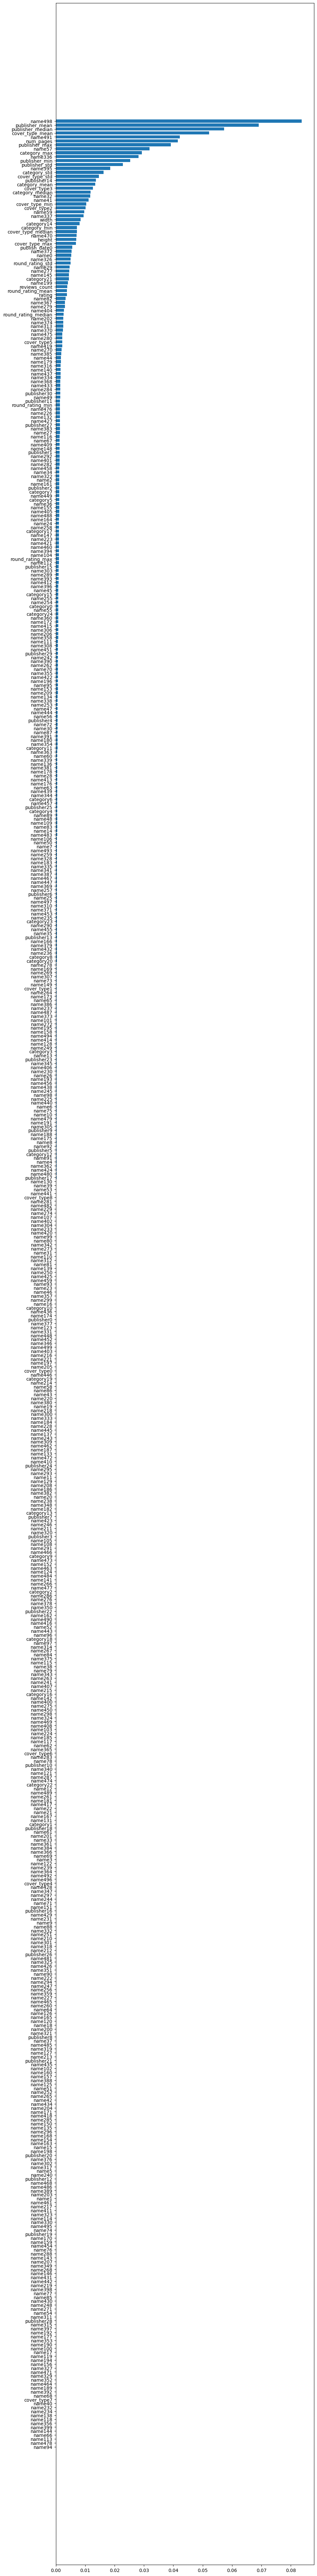

In [136]:
# get features importance
sorted_idx = best_model.feature_importances_.argsort()
# plot features importance
plt.figure(figsize=(10, 100))
plt.barh(train_df.columns[sorted_idx], best_model.feature_importances_[sorted_idx])
plt.show()

Có thể thấy các feature về name khá quan trọng. Khi ta bỏ chúng đi thì kết quả cũng thấp hơn. Features số trang cũng khá quan trọng, vì có thể ảnh hưởng đến giá thành in ra sách. 

Kết quả thu được chưa được tốt cho lắm, cho dữ liệu bị thiếu khá nhiều và có rất nhiều trường không phải là số

## Error Analysis

Text(0, 0.5, 'MAPE')

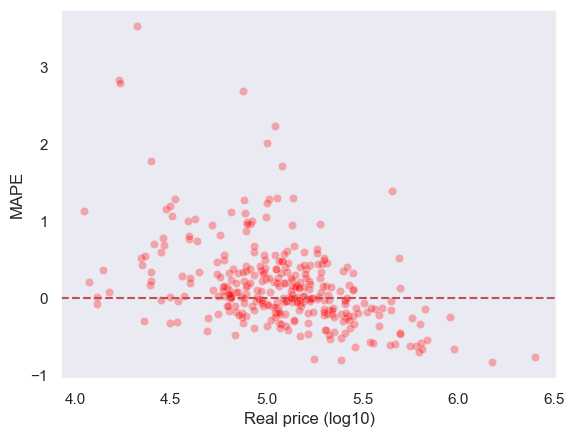

In [ ]:
sns.set(style="dark", color_codes=True)

sns.scatterplot(x= np.log10(y_val), y=(y_pred - y_val) / y_val, alpha = 0.3, color = 'red')
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.xlabel('Real price (log10)')
plt.ylabel('MAPE')